<a href="https://colab.research.google.com/github/Aabhas2/DataMining_Practicals/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.drop(columns=['id','Unnamed: 32'], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 31)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size=0.2,random_state=2)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
528,13.940,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.066150,0.1976,0.06457,...,14.62,15.38,94.52,653.3,0.1394,0.1364,0.15590,0.1015,0.2160,0.07253
291,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.1313,0.3030,0.18040,0.1489,0.2962,0.08472
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.0250,0.3057,0.07875
108,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.96080,0.2910,0.4055,0.09789
340,14.420,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.042230,0.1912,0.06412,...,16.67,21.51,111.40,862.1,0.1294,0.3371,0.37550,0.1414,0.3053,0.08764


In [ ]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.22640,0.1326,0.10480,0.2250,0.08321
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.3865,0.17080,0.3193,0.09221
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.4646,0.20130,0.4432,0.10860
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.26980,0.4023,0.14240,0.2964,0.09606


In [ ]:
X_test.shape

(114, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

## Using Cross-validation to find out best K value

In [ ]:
scores = []
for i in range(1, 16):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test,y_pred))

In [ ]:
np.max(scores)

np.float64(0.9912280701754386)

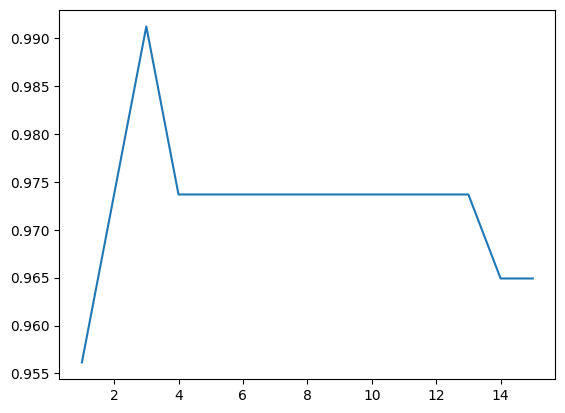

In [ ]:
plt.plot(range(1,16),scores)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, y.shape)
print(data.feature_names)

(569, 30) (569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# KNN Pipeline (Scaling + model)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=2))
])

In [ ]:
# Train and evaluate
knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Test Accuracy: 0.956140350877193

Confusion Matrix:
 [[39  3]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Choosing the best K with Cross Validation
k_values = range(1,31)
cv_scores = []
for k in k_values:
  model = Pipeline([
      ('scaler', StandardScaler()),
      ('knn', KNeighborsClassifier(n_neighbors=k))
  ])
  scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
  cv_scores.append(scores.mean())

for k, score in zip(k_values, cv_scores):
  print(f"K={k}, CV Accuracy={score:.4f}")

best_k = k_values[int(np.argmax(cv_scores))]
print("Best K:", best_k)

K=1, CV Accuracy=0.9429
K=2, CV Accuracy=0.9538
K=3, CV Accuracy=0.9692
K=4, CV Accuracy=0.9648
K=5, CV Accuracy=0.9670
K=6, CV Accuracy=0.9692
K=7, CV Accuracy=0.9714
K=8, CV Accuracy=0.9714
K=9, CV Accuracy=0.9692
K=10, CV Accuracy=0.9648
K=11, CV Accuracy=0.9626
K=12, CV Accuracy=0.9670
K=13, CV Accuracy=0.9582
K=14, CV Accuracy=0.9670
K=15, CV Accuracy=0.9626
K=16, CV Accuracy=0.9582
K=17, CV Accuracy=0.9582
K=18, CV Accuracy=0.9582
K=19, CV Accuracy=0.9604
K=20, CV Accuracy=0.9604
K=21, CV Accuracy=0.9604
K=22, CV Accuracy=0.9604
K=23, CV Accuracy=0.9582
K=24, CV Accuracy=0.9560
K=25, CV Accuracy=0.9538
K=26, CV Accuracy=0.9516
K=27, CV Accuracy=0.9538
K=28, CV Accuracy=0.9516
K=29, CV Accuracy=0.9538
K=30, CV Accuracy=0.9538
Best K: 7


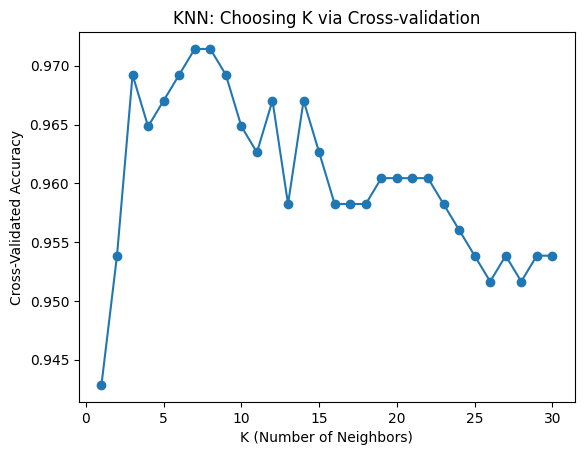

In [ ]:
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Choosing K via Cross-validation')
plt.show()

In [ ]:
best_knn = Pipeline([
    ('scaler',StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])
best_knn.fit(X_train,y_train)
y_pred_best = best_knn.predict(X_test)

print("Test Accuracy with best K:", accuracy_score(y_test,y_pred_best))
print(confusion_matrix(y_test,y_pred_best))
print(classification_report(y_test, y_pred_best))

Test Accuracy with best K: 0.9736842105263158
[[39  3]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



# Data Preprocessing Practice

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'city': ['Delhi','Delhi', 'Mumbai','Mumbai','Chennai'],
    'sales': [100,200,150,50,300]
})
# aggregate sales for each city
agg_df = df.groupby('city')['sales'].sum().reset_index()
print(agg_df)

      city  sales
0  Chennai    300
1    Delhi    300
2   Mumbai    200


In [ ]:
df.groupby('city')['sales'].agg(['sum','mean','max'])

,sum,mean,max
city,,,
Chennai,300,300.0,300
Delhi,300,150.0,200
Mumbai,200,100.0,150


In [ ]:
# Sampling: means selecting representative subsets of data. Types: Random sampling, Stratified sampling, Systematic sampling
# Random Sampling
sample = df.sample(n=3, random_state=42)
print(sample)

      city  sales
1    Delhi    200
4  Chennai    300
2   Mumbai    150


In [ ]:
# Stratified Sampling (train-test split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=2,stratify=y, random_state=42
)

## Dimensionality Reduction
PCA (Principal Component Analysis)

* What it is:
  Reduces number of features while keeping most variance (information).
* PCA projects data onto new axes (principal components) that maximize variance, reducing dimensionality.

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

# PCA requires scaling
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explanined variance:", pca.explained_variance_ratio_)

Explanined variance: [0.72962445 0.22850762]


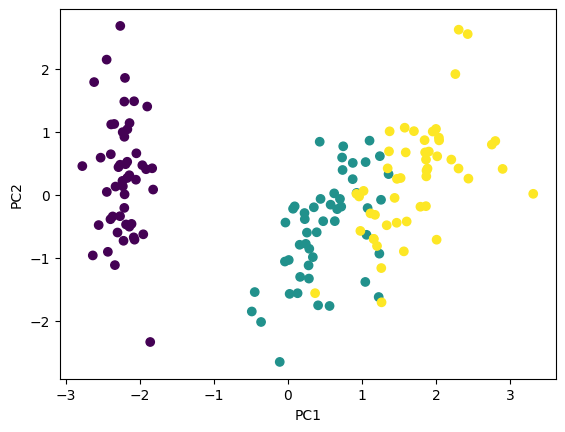

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:, 1], c=iris.target)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Feature Subset Selection
Techniques
* Filter methods (Correlation, Chi-square)
* Wrapper methods (RFE)
* Embedded methods (Lasso, Decision Tree)

Feature subset selection chooses the most important features using statistical tests, model-based importance, or recursive elimination.

In [10]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [ ]:
# Filter methods: SelectKBest (ANOVA F-test)
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X,y)

print("Selected features:", selector.get_support())

Selected features: [False False  True False False False False  True False False False False
 False False False False False False False False  True False  True False
 False False False  True False False]


In [ ]:
selected_cols = X.columns[selector.get_support()]
print(selected_cols)

Index(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'],
      dtype='object')


In [ ]:
# Wrapper methods RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

print(rfe.support_)
print(X.columns[rfe.support_])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[ True False False False False False False False False False False  True
 False False False False False False False False  True False False False
 False  True  True False False False]
Index(['mean radius', 'texture error', 'worst radius', 'worst compactness',
       'worst concavity'],
      dtype='object')


In [ ]:
# Embedded methods (Model picks features automatically)
# Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

,0
worst perimeter,0.157574
worst area,0.136174
worst radius,0.119880
mean concave points,0.098477
worst concave points,0.092877
mean perimeter,0.057952
mean area,0.046285
worst concavity,0.039892
mean concavity,0.038748
area error,0.030193


In [ ]:
# LASSO for Feature Selection
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.02))
])
lasso.fit(X,y)

coeff = lasso.named_steps['lasso'].coef_
selected_lasso_features = X.columns[coeff != 0]
selected_lasso_features

Index(['mean texture', 'mean concave points', 'radius error', 'worst radius',
       'worst texture', 'worst smoothness', 'worst concave points',
       'worst symmetry'],
      dtype='object')

## Feature Creation
Types:
* Create features from dates
* Binning
* One-hot encoding
* Polynomial features
* Interaction terms

Feature creation generates new informative variables from existing ones.

In [2]:
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print("Original shape:", X.shape)
print("New shape:", X_poly.shape)

Original shape: (150, 4)
New shape: (150, 14)


In [5]:
# Binning (Turning numerical -> categorical)
X['radius_bin'] = pd.cut(
    X['mean_radius'],
    bins=[0,10,20,30],
    labels=['small','medium','large']
)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [6]:
df = pd.DataFrame({'date': pd.date_range(start='2023-01-01',periods=10)})

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek

df

,date,year,month,weekday
0,2023-01-01,2023,1,6
1,2023-01-02,2023,1,0
2,2023-01-03,2023,1,1
3,2023-01-04,2023,1,2
4,2023-01-05,2023,1,3
5,2023-01-06,2023,1,4
6,2023-01-07,2023,1,5
7,2023-01-08,2023,1,6
8,2023-01-09,2023,1,0
9,2023-01-10,2023,1,1


## Variable Transformation

In [12]:
feature = X['mean area']

In [13]:
feature

,mean area
0,1001.0
1,1326.0
2,1203.0
3,386.1
4,1297.0
...,...
564,1479.0
565,1261.0
566,858.1
567,1265.0


In [14]:
# Log transform
X['log_area'] = np.log1p(X['mean area'])

In [15]:
X['log_area']

,log_area
0,6.909753
1,7.190676
2,7.093405
3,5.958683
4,7.168580
...,...
564,7.299797
565,7.140453
566,6.755885
567,7.143618


In [16]:
# Square root transform
X['sqrt_area'] = np.sqrt(X['mean area'])

In [17]:
# Yeo-Johnson (Power Transformer)
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
X['yj_area'] = pt.fit_transform(X[['mean area']])

In [18]:
# Box-cox (positive values only)
from sklearn.preprocessing import PowerTransformer
pt_bc = PowerTransformer(method='box-cox')
X['bc_area']  = pt_bc.fit_transform(X[['mean area']])